<img align="center" width="12%" style="padding-right:10px;" src="../Images/Ccom.png">

# Integrated Seabed Mapping Systems <a href="https://piazza.com/class/jzvaaav18cf2j7"><img src="../Images/help.png"  title="Ask questions on Piazza.com" align="right" width="10%" alt="Piazza.com\"></a><br><br> Lab B: Refraction (Fall 2019)

___


<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/refraction1.png"><br><br>

## Lab intent


This second lab is designed to encourage you to implement your own ray tracing algorithm for class `SSP`. This should be developed as a method for use in the last lab of the term (when you will have to ray trace 400-800 beams from a single swath cycle).

That function will have as input:

    1.A starting depression angle
    2.A starting depth
    3.A two-way travel time

And from that you will calculate two things :

    1.depth of the bottom strike
    2.Radial distance out from transducer to the bottom strike
    
To help you understand the significance of sound speed variability, this lab will allow you to calculate:

    •how long it should take for sound to reach a flat seafloor of a given depth
    •How much of a depth (and radial distance error) would result if you use the wrong sound speed profile


***

## The Data

<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/mvp.png"><br><br>

The profiles you will be using as examples are real measurements taken using a **Moving Vessel Profiler” (MVP)**. The model used was an ODIM MVP-300 (The system is now built and marketed by AML). This is designed to be used to take underway profiles to a depth of up to ~300m from a vessel moving at 12 knots. The example is from a MVP-300 installed on the Canadian Coast Guard Ship (CCGS) Amundsen, Canada’s research icebreaker.

The MVP-300 towfishis equipped with a Seabird CTD 911+ sensor measuring **Conductivity** (proxy to salinity), **Temperature**, and pressure (proxy to **Depth**), known as a **CTD**. From those measurements, the speed of sound is modeled for use by the ship-mounted EM300 30 kHz multibeam sonar.

The towfish is dragged continuously behind the vessel at a depth just above the multibeam transducer. When released to freefall, it falls at a speed of about 5m/s and thus it takes about one minute to drop from near the surface to 300m. The limiting time however is that taken to winch back in the sensor. In that time, the vessel has moved forward 60x6m/s = 360m. Thus there is a total of ~ 700-800m of cable deployed. The recovery speed is about 1m/s so it takes about 10 minutes to get all the cable back in.

It can thus deploy every ~15 minutes in if need be. For the example shown here it was set to cycle every 30 minutes.

___
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/ssp_area.png"><br><br>

The example used in this lab here is a transect of 18 profiles taken at ½ hour intervals along a NE-SW transect across the Labrador Current. The section took 9 hours to acquire covering a total transit of ~110 nautical miles.

The section covers from the main open Labrador Sea, onto the continental shelf where the Labrador Current is flowing from North to South, bringing cold brackish water from Baffin Bay down onto the Grand Banks.

The area is of high survey significance to Canada when considering drilling on the Labrador Margin. The largest single impediment to drilling is the presence of huge icebergs that are swept down from Greenland in the Labrador Current. These icebergs carve giant grooves on the continental shelf and are thus an active hazard for oilfield infrastructure.

Your challenge is to accurately survey the outer shelf (200-300m depth) with sufficient accuracy (let's say IHO Order 1 so ~+/-1% of depth). To achieve this accuracy you must have a reasonable approximation of the sound speed structure.

This data set illustrates typical changes in that structure over a distance of ~6 nautical miles (1/2 and hour of ship time). Most ships **do not** have an MVP and thus sound speed profiles are usually only taken at intervals of 3-6 hours.

___
#### Temperature and Salinity Structure along the section
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/t_s_map.png"><br><br>
The figure above shows you the temperature and salinity structure along the section.

Note the coldest and most brackish water in the south flowing Labrador current. That water is most brackish and slightly warmer at the surface. Cold and salty is more dense of course. Note however, that on the outer shelf there is a mid-water (~50-100m depth) temperature maximum with colder water above. If there were no other variation, this would be unstable as colder water should be heavier. But looking at the salinity we see that the surface waters are more brackish and thus make the water less dense even though it is colder.

Indicated in the figure above are the locations of profiles 112 and 113 from which you have to do the calculations. Additionally, profiles 102 and 103 are also indicated. You will be asked what you think the influence of the change is there.

___
#### Derived Density and Sound Speed Structure
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/rho_ss_map.png"><br><br>
The plots above  are derived from the salinity and temperature structure shown in the previous section.

The top plot is density and is derived using the **UNESCO equations**, knowing temperature, salinity and pressure. As can be seen the density structure most strongly mimics the salinity structure, indicating that the salinity is the more significant factor in density in this case.

The lower plot is the sound speed which is derived using the Chen and Millero publication (again knowing temperature, salinity and pressure). In this case, the structure most closely resembles the temperature structure seen on the previous page. Thus clearly temperature is a greater influence on sound speed in this environment than salinity.

As previously the locations of profiles 112 and 113, from which you have to do the calculations, are shown; profiles 102 and 103, where you are going to be asked what you think the influence of the change is, are also shown.

___
#### How much the Water Mass can change in ~½ an hour
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/ssps_over_time.png"><br><br>

The figure above illustrates two sequential MVP dips. In real time, you only have the last dip available to calculate the refracted ray path. Thus for the ~½ hour after the first dip has been acquired, all calculations are being performed using a water mass that is become increasingly out-of-date.

After 40 minutes, a second dip takes place. You can see that the water-mass is remarkably different. Even though the near-surface sound speeds and the ones at ~250m depth are almost identical, for the majority of the profile, the newer dip reveals much slower sound speeds.

Note that, while the near surface sound speeds are almost identical, the reason for them being this value is quite different. In the first cast it was due to cold-salty water. Now, almost the same sound speed value is being reported, but for warmer less salty water.

How much does all this matter? In this lab, you will quantify the exact depth and radial distance error that results in from rays traced assuming the old water-mass, when if fact, the underlying water is the new water-mass.

___
#### Estimating the Refraction Error
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/refraction_error.png"><br><br>

To estimate the resulting error, you need to compare actual depth with the resultant erroneous depth. That error will vary both with total depth and incidence angle. As a result you need to pick a depth of interest (representative of the depth in which you are working). In this case we are picking a flat seabed at 250m depth. At that depth we then look at beams with incidence angles ranging from 0 (vertical incidence) to ~70 degrees (the widest you would be likely to attempt bottom detection).

##### Calculating the true TWTT and the true Radial distance

We need to find out the true TWTT and resulting radial distance that would result from beams over that range of incidence angles. To do that, one merely performs a ray trace, but in this special case the depth is known, but the TWTT is unknown (the reverse of the usual situation). Thus, you are tracing, keeping track of the TWTT accumulated until you arrive at your desired depth. As a result of this you will calculate an array of TWTTs and radial distances for the range of incidence angles you are testing for (for example 0 to 70 degrees at 1 degree intervals). You do this for the actual water-mass that you are really in.

##### Calculating the Erroneous Depth and Radial Distance
Now that you have this set of TWTTs , you use the usual forward calculation, tracing a ray through all the layers of the false sound speed profile until the TWTT is reached. You then compare the depth and across track distance.



___
#### Lab Deliverables

The deliverables for this lab are code that produces two plots with the X-axis being the true across track distance

    1. With the vertical axis axis being the vertical error
    2. With the vertical axis being the horizontal error
    
In addition you will be asked a number of essay questions


In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
from numpy import cos,pi,sin,pi,arccos
from pathlib import Path

lab_a=Path('../Lab_A/') # Get the path to your Lab_A folder
sys.path.append(str(lab_a.resolve())) # add the Lab_A folder to the list of paths 

from mycode.position import *
from mycode.SSP import SSP
from mycode.analyzess import AnalyzeSS

___
## B.0 Reading the Sound Speed Profiles


You already created a class to handle Sound Speed Profile (**SSP**) data in Lab A. We will further develop this class for our use in this Lab B. For convenience, and more importantly, not to create more than necessary versions of the class we will continue to use the same class definition file. In order to do this we need to add to the path where Python searches at run-time. The line:

    lab_a=Path('../Lab_A/')
    
creates a `Path` object named `lab_a`. Relative to the current working directory we go up one directory and then into directory `Lab_A` which is where the folder `mycode` holding the .py files you created in lab A are located.

    sys.path.append(str(lab_a.resolve()))
    
in the code cell above then adds the full path to the system paths. This now makes the .py code files in the `mycode` folder available for use here, as seen in the code cell below

In this step we will need to determine the arc-cosine of angles. Make sure that at the top of `SSP.py` the following line is present
    
     from numpy import pi, cos, sin, log, exp, arccos
     
We will also need some of the functionality provided by the Position class - to this end also add the line:

    from mycode.position import *
    

In [2]:
test=SSP()
print(type(test))


<class 'mycode.SSP.SSP'>


___
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/ssp_mvp_format.png"><br><br>

##### The data content of the provided Sound Speed Profiles

In the figure above you see the contents of two data files. We will need to create an additional data parser which is able to interpret the data collected with the MVP 300 System. You will find that often similar data are presented in very different ways to you, if your classes are well designed parsing these different data formats becomes an issue of simply adding read methods.

The figure shows you the detailed format of the data content of each MVP dip file.
As can be seen, the sensor is integrated with the shipboard navigation so that the following data are recorded:

    1.Launch Location
    2.Time of launch
    3.Speed of vessel at launch
    4.Depth at launch location

All these are derived from NMEA telegrams (which are automatically preserved in the file).


____
### B.0.1 Add Variables to the SSP class

<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

Update the SSP `__init__` by adding the fields `self.vessel_speed` and `self.bot_depth` and give them the value `None`
<br><br><br>
___
### B.0.2 Parse the Header of MVP Data Files

    def read_mvp_file(self, fullpath):

        # Check the File's existence
        if os.path.exists(fullpath):
            self.metadata["Source File"] = fullpath
            print('Opening sound speed profile data file:' + fullpath)
        else:  # Raise a meaningful error
            raise RuntimeError('Unable to locate the input file' + fullpath)

        # Open, read and close the file
        svp_file = open(fullpath)
        svp_content = svp_file.read()
        svp_file.close

        # Tokenize the contents
        svp_lines = svp_content.splitlines()
        
        # Create a Position object       
        pos = Position()
        
        n_lines = 0
        for line in svp_lines:
            print( line)
            n_lines += 1
        
Add the method `read_mvp_file` shown above to the SSP class. If done correctly the code cell below will show you the contents of the MVP data file "Oct4_slope.112m1.txt" found in your "Data" directory for Lab B.


In [3]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.txt')

Opening sound speed profile data file:Data/Oct4_slope.112m1.txt


___
### B.0.2.0 Find the end of The Header

What you will notice is that the meta data is separated from the various records. The other thing that you will notice is that the data contains the observations of the CTD (P, C, T) as well as data that are derived from these values (Dpth, SV, S, Rho). In our case we will read the data file in two parts, first the header and then the data records, and rather than processing the raw data (which would be a lab on its own) we will use the processed results.

A simple way of reading just the header is to stop the execution of the for loop when the line 'P(dbar),C(mmho/cm),T(degC),Dpth(m),SV(m/s),S(PSS-78),Rho(kg/m^3)' is encountered. However, the problem with this is that for the MVP 30 the contents of the data records depend on the installed sensors, which means that the contents of this line may vary. However, the line describing the records is alway preceded by an empty line - we may use this to help us parse the file. 

Break the loop when the contents of `line` are equivalent to '', that is line is an empty string. If you now run the code cell above it should show you just the contents of the header, except for the last line: *P(dbar),C(mmho/cm),T(degC),Dpth(m),SV(m/s),S(PSS-78),Rho(kg/m^3)*


___
### B.0.2.1 Find the Time

You will see that there are more than one time contained in the file. The PC Time is problematic since it may be in any time zone and the clock may not be very accurate. The GNSS time contained in **NMEA-0183** records is much more accurate and always referenced to **UTC**. There is a dedicated time message known as a 'ZDA'. NMEA messages are always related to navigation. It does make sense to add a `function` to the `position.py` file that takes a ZDA NMEA messages and returns a datetime object. 
    
In the `position.py` file add the following function at the end

    def ParseNMEA0183_ZDA( dt_str):
        obs = dt_str.split(',')
        time = datetime( 
                int( obs[4]), int( obs[3]), int( obs[2]), 
                int( obs[1][0:2]), int( obs[1][2:4]), int( obs[1][4:6]),int(obs[1][7:])*10000)
        return time

Finally add an if statement that executes the following when `line[0:12]` == "GPS Time" in the `for` loop parsing the MVP file header in the `read_mvp_file()` method

            # Parse the time
            if line[0:8] == "GPS Time":
                # Extract the ZDA record
                obs = line.split()

                # Extract the UTC time string
                self.obs_time = ParseNMEA0183_ZDA(obs[2])
                
Make sure that you understand what the NMEA 0183 ZDA message contains by using an Internet search.

___
### B.0.2.2 Find the Position

You will see that the vessel position is stored in another **NMEA-0183** record, namely a GGA record. GGA records are always referred to WGS84, Note that the MVP will store any type of positioning message. for now we will check to see whether we have a GGA message and create an error otherwise. 

In the `position.py` file add the following function at the end

def ParseNMEA0183_GGA( dt_str):
    
    # Get the GGA string and tokenize it
    gga_data = dt_str.split(',')

    # verify that we have a GGA string
    if not gga_data[0][-3:] == "GGA":
        raise RuntimeError(
                'ParseNMEA0183_GGA: argument `dt_str` must be a GGA message')

                
    # Determine the time of day from both the header and the GGA string
     
    gga_timedelta=timedelta(hours=int(gga_data[1][0:2]), \
                             minutes = int(gga_data[1][2:4]), \
                             seconds = int(gga_data[1][4:6]))
           
                
    # Parse the latitude
    if gga_data[3].lower() == "n":
        lat = float(gga_data[2][0:2])+float(gga_data[2][2:])/60.
    else:
        lat = -float(gga_data[2][0:2])-float(gga_data[2][2:])/60.             

    # Parse the longitude
    if gga_data[5].lower == "w":
        lon = float(gga_data[4][0:3])+float(gga_data[4][3:])/60.
    else:
        lon = -float(gga_data[4][0:3])-float(gga_data[4][3:])/60.               

    # Parse the GNSS Quality indicator
    q = int(gga_data[6])

    # Parse the number of GNSS satellites used for the solution
    n_sats = int(gga_data[7])

    # Parse the HDOP Quality indicator
    hdop = float(gga_data[8])

    # Parse the orthometric height 
    height = float(gga_data[9])
                
    # Generate an error if the units of the orthometric height is not meters
                                   
    if gga_data[10].lower() != "m":
        raise RuntimeError('Orthomeric height units are not meters!')                
                
    # Parse the geoid ellipsoid separation
    separation = float(gga_data[9])
                                   
    if gga_data[12].lower() != "m":
        raise RuntimeError('Orthomeric height units are not meters!') 
              
       
    # If there is more data then parse it
    corr_age = None
    corr_station = None
    if not gga_data[13] == "":
        corr_age = float(gga_data[13])
        corr_station = float(gga_data[14][0:-3])
                    
    # For now, ignore the checksum (this would become a computer science assignment

    return gga_timedelta, lat, lon, q, n_sats, hdop, height, separation, corr_age, corr_station

Finally add an if statement that executes the following when `line[0:12]` == "GPS Position" in the `for` loop parsing the MVP file header in the `read_mvp_file()` method

            # Parse the position
            if line[0:12] == "GPS Position":
                # Extract the ZDA record
                obs = line.split()

                # Extract the UTC time string
                _, self.obs_latitude, self.obs_longitude, _, _, _, _, _, _, _ = ParseNMEA0183_GGA(obs[2])
                
Make sure that you understand what the NMEA 0183 ZDA message contains by using an Internet search.
                
                

___
### B.0.2.3 Find the Bottom Depth

The next field that should be parsed is the bottom depth. Typically this is the instantaneous ocean depth, but there is no matadata that will allow us to verify this. Regardless we will interpret it as such


Add an `if` statement that executes the following when `line[0:13]` == "Bottom Depth:" in the `for` loop parsing the MVP file header in the `read_mvp_file()` method

            # Parse the Depth
            if line[0:13] == "Bottom Depth:":
                obs = line.split()
                self.bot_depth=float(obs[2])

___
### B.0.2.4 Find the Vessel Speed

The last field that should be parsed is the vessel speed, the data file uses knots,but we want to use m/s so we need to divide the speed by 1.852


Add an if statement that executes the following when `line[0:13]` == "Bottom Depth:" in the `for` loop parsing the MVP file header in the `read_mvp_file()` method

            # Parse the Vessel Speed
            if line[0:11] == "Ship Speed:":
                obs = line.split()
                self.vessel_speed=float(obs[2])/1.852
                

___
### B.0.2.5 Parsing the Record Identifier Line

Now that we have parsed the header we can exit the `for` loop parsing the MVP file header in the `read_mvp_file()` method. The next type is to parse the last line of the header which identifies the type and units of the data contained in the columns of the data records.

The first step is to split the last header line

        rec_type = svp_lines[n_lines].split(',')
    
To find the index of the Depth records we can then use:

        index_depth = rec_type.index('Dpth(m)') 
        
Similary find the index for the Sound Speed records and assign them to `index_ss`
         

___
### B.0.2.6 Parsing the Records

We can finally parse the data!  

        for line in svp_lines[ n_lines + 1:]:
            obs = line.split(',')
            self.obs_depth.append( float(obs[index_depth]))
            self.obs_ss.append( float(obs[index_ss]))

Will read all the data records into the `SSP` data object.
         

___
### B.0.2.7 Sorting the Records

Although we now have all the data, it is not a given that the data in the profile are sorted by depth. The records are written sequentially and so, *usually* each subsequent record has a greater depth associated to it. This is, however, not guaranteed! It may be that the MVP winch moved faster upwards than the probe was falling through the water, leading to a reversal in the recorded depths. To make sure that this is not the case you should sort the profile's observed depths and sound speeds by depth, this is achieved by the following code that sorts both lists simultaneously by the contents of the list `self.obs_depth`:

        temp = sorted(zip(self.obs_depth, self.obs_ss), key=lambda x: x[0])
        self.obs_depth, self.obs_ss = map(list, zip(*temp))
       

___
### B.0.2.8 Removing the Duplicates

Much like there may be reversals there may be duplicates i.e., depths for which there is more than one observation. There are several approaches that you may take to deal with this. Ideally the sound speed values will be the same, but in reality they will probably differ slightly - this is actually an opportunity for quality control.

However, we will take a simple approach here, we will simply take the first observation for a given depth and then remove the others, this may be achieved by adding the following to the end of the `read_mvp_file()` method:

        # Remove any duplicate depths with associated sound speeds
        d_p=self.obs_depth[0]
        index = 0
        unwanted = []
        for d in self.obs_depth[1:]:
            index += 1
            if d == d_p:
                unwanted.append(index)
            d_p = d
            
        for e in sorted( unwanted, reverse = True):
            del self.obs_depth[ e]
            del self.obs_ss[ e]

Make sure that you understand the code snippet given here and ask yourself why the duplicates should be removed in reverse order.

___
### B.0.2.9 Creating numpy Arrays

For the processing it will be useful to use numpy arrays - we will create 3 of these arrays, namely `self.c`, `self.d` and `self.g` to hold the sound speeds the depths and the associated gradients respectively. Add these variables to the class definition and at the end of the `read_mvp_file` assign them values e.g., `self.d` may be assigned as follows:

    self.d = np.array(self.obs_depth)
    
assign `self.c` in similar manner:

___
### B.0.2.10 Extending the profiles to the Surface
    
The problem that may occur is that the transducer may rise above the level of the first sound speed observation. To address this we should extend the profile to the surface. To extend the velocities to the surface we face a bit of a conundrum as we do not have an observed value there i.e., we are extrapolating. We know that sound velocity profiles typically start close the surface. The surface waters are *usually* well mixed due to wave action, thus we may expect that the sound speed at the surface is the same as at the first sample in the profile:

    
        if self.d[0] > 0:
            self.d = np.insert(self.d,0,0)
            self.c = np.insert(self.c,0,self.c[0])
            
    
Note that this assumption **fails** when there is no mixing at the surface - this is one of the reasons that surveying on calm seas can be problematic. 

___
### B.0.2.11 Calculating the Sound Speed Gradients
  
The variable `self.g` will be the gradient of soundspeed for the layers, that is:
$$g_i=\frac{c_{i+1}-c_{i}}{d_{i+1}-d_{i}} = \frac{\Delta c}{\Delta d}$$

You can implement $c_{i+1}-c_{i}$ as `self.c[1:] - self.c[0:-1])` without having to use a for loop; the depth differences may be determined similarly.

Assign `self.g` the gradients as shown in the equation above.

___
### B.0.2.12 Expanding the Profiles to Full Ocean Depth
  
We also want to expand the profile to full ocean depth in case we have depth observations beyond the deepest sound speed sample. We may achieve this by making the assumption that the gradient is determined by the pressure effect alone (g=0.017$s^{-1}$). Add a block of code that adds the full ocean depth of 12,000m to the end of array `self.d`, the associated sound speed calculated using the gradient g=0.017$s^{-1}$ to the array `self.c` and the gradient used to the array `self.g`. **Only** do this if the greatest depth in the profile is smaller than 12,000m

___
### B.0.2.13 Replacing Zero Gradients
  
For our calculation we will be using division by the gradients, to avoid numerical problems we want to replace zero values by a very small number. You may do this by the statement

    self.g[self.g == 0] = 0.000001

___
### B.0.2.14 Updating the profile
  
Now that we have updated the profile we need to update the sound speeds, otherwise the calculations will fail when encountering a layer that had zero sound speed gradient

        # Recalculate the sound speed profile
        
        for i in range(1,len(self.g)):
            self.c[i]=self.c[i-1]+(self.d[i] - self.d[i-1])*self.g[i-1]

***NOTE that,even though the adjustments are very small, we are inherently biasing the profile here - there are better ways of doing this, but we want to keep the time spent on this lab reasonable***

___
### B.1.3 Processing the Data - Estimating the Depth and Radial Distance Through Ray-Tracing

<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/hor_strat.png"><br><br>

Now that we have the sound speed well conditioned and stored in a `SSP` object we are ready to start creating methods for interacting with the data. In Ocean Mapping the most common action is to determine the path of a ray using a starting depth at which the signal originated, a depression angle indicating the angle of departure and TWTT indicating the time of flight from transmission at the transducers to the seafloor and back. 

Given an initial beam-vector starting point (in depth) within a layered ocean as shown in the figure above, a vertically referenced depression angle, and a known two-way travel time to a bottom detection, we will now model:
    
    1 the depth below the starting point
    2 the radial horizontal distance from the starting location
    
**Oceanographic Simplifications**

Normally, the only sound speed profile information consists of a vertical section. No knowledge of the lateral variability of sound speed in the ocean is available. As a result, a simplifying assumption is usually made that the ocean consists only of horizontal layers with no lateral variability. The primary result of this assumption is that the beam azimuth will remain constant: that the ray only changes in depression angle as it penetrates through the layers.

In reality, there are significant lateral sound speed gradients in the ocean. These can include: Oceanic fronts (e.g. the edge of the Gulf Stream or Kuroshiro) Tidal fronts (representing the boundary between mixed and stratified waters)
River plume edges.

The only way to cope with these is to make more frequent sound speed profiles. As time evolves or the ship moves, the ocean is obviously changing. There are strategies to gradually adjust the sound speed with space or time, but even under these circumstances, there is one simplifying assumption that is commonly made:

        For the duration of a single ping, the sound speed structure does not change with azimuth. That is to say, a ray traced to the north, versus a ray to the west (or other azimuth), does not follow a different trajectory in the vertical plane.




___
### B.1.3.0 Processing the Data

 To do this start by creating a method called `ray_trace()` that takes the arguments `d_start`, `th_start` and `twtt`

The ray trace solution may proceed. This involves tracing the beam vector through the water column, accumulating traveled distance and time consumed in each layer of the ocean, until the TWTT is arrived at. At that point one has a measure of the vertical distance and radial distance in the vertical plane through which the ray has progressed.
That vertical distance and radial horizontal distance may now be expressed as the total depth (adding the transducer draft), and along track and across track distance. Along and across track are X and Y horizontal axes aligned fore-aft and transverse to the transmitter position.


___
#### B.1.3.0.0 Method for Determining Depths 

Now that we have the sound speed well conditioned and stored in a `SSP` object we are ready to start creating methods for interacting with the data. In Ocean Mapping the most common action is to determine the path of a ray using a starting depth at which the signal originated, a depression angle indicating the angle of departure and TWTT indicating the time of flight from transmission at the transducers to the seafloor and back. 

Create a method called `determine_depth()` for the `SSP` class that takes the arguments `d_start`, `th_start`, `ss_start` and `twtt`. In the method assign the variables `depth`, `rad_dist`, `layer_s` and `layer_e` all the value zero. return all the variables as a tuple using the statement

    return depth, rad_dist, layer_s, layer_e; 
    
If you did this correctly the code cell below should now execute, but all the values printed should be zero i.e., we still have to make it work correctly.

In [4]:
# from numpy import arccos, pi
# depth, rad_dist, start, stop = ssp.determine_depth(4,20*pi/180,1464,0.2)
# # depth,rad_dist,start_bin,stop_bin = ssp.determine_twtt(10,20)
# print("Depth           : "+str(depth))
# print("Radial Distance : "+str(rad_dist))
# print("Start layer     : "+str(start))
# print("Stop layer      : "+str(stop))
# arccos(1)

#### B.1.3.0.1 Determine the Start Layer
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/layer_indexing.png"><br><br>

The first task at hand is the determination of which layer `d_start` is located. Using the logic as indicated by the equation in B.0.2.9 result in indexing as shown in the figure above. For example if `self.d[0]`==0 and `self.d[1]`== 10 and d_start == 3 then the start layer `layer_s` == 0

Just above the `return` statement assign the `layer_s` the correct value based on `self.d` and and `d_start`. the code cell below should now execute correctly

In [5]:
d_start=10
depth, rad_dist, start, stop = ssp.determine_depth(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.d[start])+"m to "+str(ssp.d[start+1])+"m" )


Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m


/home/jupyter-semmed/ESCI_OE_774_874/Lab_A/mycode/SSP.py:201: RuntimeWarning: invalid value encountered in arccos
  th = arccos(self.c[0:]*ray_c)


#### B.1.3.0.2 Determine the Ray Constant
<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/steering_velocity.png"><br><br>

One of the operational problems you will face in the ray trace calculation is the fact that the sound speed at the face of the array (continuously measured and provided with each observation), may no longer match the sound speed measured at the array depth in the archived sound speed profile that you are using.

<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/ss_mismatch.png"><br><br>

This would be because the sound speed profile was measured previously (back in time) and at a location other than the current position. The current *surface* sound speed (in fact measured at the depth of the array –see photo to bottom left), is logged continuously and recorded together with each swath. The sonar calculates the steering angle using the current surface sound speed. For this the **ray constant** is used, given by the equation:

$$C_{ray}=\frac{cos(\theta_d)}{c_{start}}$$
Where:<br>
$C_{ray}$: Ray Constant<br>
$\theta_d$: Depression angle<br>
$c_{start}$: Sound speed at transducer<br>

In your `determine_depth` method calculate the ray constant `ray_c` using  `ss_start` and the depression angle `th_start`.

#### B.1.3.0.3 Calculate Ray Path Properties for Each Layer

<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/ray_trace.png"><br><br>

If the sound speed gradient is constant in each layer then the ray path followed by the signal describes in the layers forms an *arc of circle* whose radius is defined by the radius as follows

<br><br><img align="center" width="60%" style="padding-right:10px;" src="../Images/r_curvature.png"><br><br>

From the figure (***there are some errors that need to be fixed!!***) we see that (**these are the correct equations**):


$$R_{i}=\frac{-c_i}{g_i\cdot cos(\theta_i)}=-(C_{ray}\cdot g_i)^{-1}$$<br><br>
$$\theta_{i}=arccos(c_i\cdot C_{ray})$$<br><br>
$$\Delta x_i=R_i\cdot(sin(\theta_{i+1})-sin(\theta_i))$$<br><br>
$$\Delta d_i=d_{i+1}-d_{i}$$<br><br>
$$H_i=\frac1{g_i}\cdot ln \left(\frac{c_{i+1}}{c_i}\right)$$<br><br>
$$\Delta t_i=H_i+\frac1{g_i}\cdot ln \left( \frac{1+sin\theta_i}{1+sin(\theta_{i+1}}\right)$$

Where:<br>
$i$: Index of the current layer, being layer `layer_s`<br>
$R$: Radius of path curvature in layer i <br>
$\theta_i$: Depression angle at the top of layer i <br>
$\Delta x_i$: Radial distance traversed in layer i <br>
$\Delta d_i$: Vertical distance traversed in layer i <br>
$H_i$: Harmonic mean sound speed for layer i <br>
$\Delta t_i$: The **one-way** travel time for traversing layer i <br><br>
the formulation of these equations means that once we know the ray constant we can now calculate the ray parameters for **all** the layers without using a for loop. This is regardless of whether the signal actually traversed through the layer!

For example we can can calculate all the layer thicknesses `delta_d` by using:

    delta_d = self.d[1:] - self.d[0:-1]

In similar manner calculate all radii of curvature `r_curve`, all depression angles `th`, horizontal distances `dx`, vertical distances `dz`, Harmonic means `hm` and two way travel times `dtwtt`. Don't forget that $\Delta t$ is the one-way travel time!

# ___
<img align="left" width="6%" style="padding-right:10px;" src="../Images/info.png">

`numpy.diff(self.d)` achieves the same result as `self.d[1:] - self.d[0:-1]`, this function is useful when needing to determine higher order differences e.g., `numpy.diff(self.d),2)` results in the second order difference for the array `self.d`
# ___

# ___
<img align="left" width="6%" style="padding-right:10px;" src="../Images/info.png"><br><br><br>
If we transmit downwards then $\theta_i > 0$, thus when $theta_i$ becomes zero it has reached a depth where the ray inverts and starts traveling upwards. We can calculate **all** locations where the reversals occur using the ray constant $C_r$ and $\theta=0$:

$$\theta = 0\Rightarrow$$<br>
$$arccos(c_r\cdot C_{ray})=0\Rightarrow$$<br>
$$c_r\cdot C_{ray}=1$$<br>
$$c_r=\frac{1}{C_{ray}}$$

Where:<br>
$c_r$: Sound speed at which ray reversals occur<br>

Knowing the above you may find all the layers in which ray path reversals occur for a given ray constant, thus you may alter this method to address this, here we will not do so, as the assignment will get too extensive. Not dealing with this will, however, potentially result in values $c_r\cdot C_{ray}>1$ for which the arccos function is undefined.

*You will at this point encounter a warning related to the numpy.arccos() function - this happens when the argument passed is >= 1, given the above you know that this happens when the ray has reversed in a layer. The numpy.arccos() function will return a nan in that case. See the example below*
# ___

In [6]:
a=arccos(1.1)
print(a)

nan


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


#### B.1.3.0.4 Determine the Properties for First Layer

The signal did not actually traverse through all layers - it originated in layer `layer_s` as determined in step B.1.3.0.1, and will reflect of the bottom before reaching the final layer boundary. To determine the radial distance and vertical distance traversed we then need to break up the analysis in three parts taking into account:

    1. The path traversed in the first layer
    2. The path traversed in the intervening layers
    3. The path traversed in the final layer
    
We already know how the signal traversed the intervening layers, but we must analyze the start and end layers separately. We already know what the start layer is and must determine the end layer. To this end we will simply accumulate the two travel times from the start layer to the end layer, along with the horizontal and vertical distances. Once the accumulated TWTT exceeds the travel time `twtt` passed into the `SSP.determine_depth()` method we have reached the final layer.

We will use `sum_dx`, `sum_dz`, and `sum_dt` respectively for the cumulative radial distance, vertical distance and two way travel time.

To start off we will determine properties of the hypothetical path the signal would take to travel from the boundary of the start layer to the transducer located at d_start:

    dx_init = r_curve[layer_s]*(sin(th_start)-sin(th[layer_s])
    
Similarly determine the values for `dz_init` and `dt_init` i.e., the vertical distance and the TWTT from the top of the start layer to the depth of the transducer respectively. (You may look at the example code in B 1.3.0.5 for inspiration)


#### B.1.3.0.5 Accumulate From the Start Layer

We already know how the signal traverses the layers, we will now accumulate the contributions of these layers through the `numpy.cumsum()` function starting at the start layer. This function takes a `numpy.array` argument and returns an array of equal size with the summed elements up to the index of the element e.g,  

    np.cumsum(np.ones(4))
    
returns the `numpy.array`: [1., 2., 3., 4.]

The advantage of using the cumulative sum is that we can see what the cumulated ray properties are at the boundary of each layer.



In [7]:
## Example code illustrating the use of logic with numpy arrays and 
## the numpy.cumsum() function - you may use this as inspiration for the 
## implementation of the determine_depth() and determine_twtt() methods 
## of the SSP class
## Semme J. Dijkstra

# Let's have a signal that originates at d_start and ends at d_end 
# relative to d_start
d_start = 2.1
d_down = 3

# Determine the end depth
d_end = d_start+d_down

# # Let's create a set of successive depth layers of 2m thickness
# # mu, sigma = 2, 0.1  # mean an
# # delta_d = np.random.normal(mu, sigma, 1000)
delta_d = 2*np.ones(1000)
# # Note that layers cannot have a thickness < 0
# delta_d[delta_d < 0] = -delta_d[delta_d < 0]

# # Nor can they have a thickness delta_d == 0
# delta_d[delta_d == 0] = 2

# # We can now find the depths of the boundaries using the cumulative 
# # sum. Note that we want to start at 0m
depths = np.zeros(len(delta_d)+1)
depths[1:] = np.cumsum(delta_d)

# What layer contains the starting depth?
layer_s = sum( d_start >= depths) - 1

# The distances from the start layer to the next layers
sum_d = np.cumsum(depths[layer_s+1:] - depths[layer_s:-1])

# the distance from the start layer to the start depth 
d_init = d_start - depths[layer_s]

# The total distance from d_start to all the following boundaries
# sum_d += np.cumsum(delta_d[layer_s+1:])
sum_d -= d_init

# The number of layer boundaries the signal traverses
n_bounds =  sum( d_down >= sum_d)

# The layer that contains the depth d_end (greater than d_start i.e.,
# with the assumption that the signal is travelling downward)
layer_e =n_bounds+layer_s

# Note that I could also have used layer_e = sum( d_end >= depths)  - 1
# But you can use the same logic for the TWTTs with the way I implemented it 

# The distance in the end layer
d_final = d_end - depths[layer_e]


print("Signal traversed %.2fm down from starting depth of %.2fm to a total depth of %.2fm"\
      %(d_down, d_start,d_start+d_down,))
print("\nStarting depth %.2fm is contained in layer %d"%(d_start,layer_s))
print("This layer ranges from %.2fm to %.2fm"%(depths[layer_s],depths[layer_s+1]))
print("\nThe total profile depth is %.2fm"%depths[-1])
print("The profile depth from the start depth is %.2fm"%sum_d[-1])
print("\nThe number of layer boundaries traversed: %d"%n_bounds)
print("\nThe ending depth of %.2fm is contained in layer %d"%(d_end,layer_e))
print("This layer ranges from %.2fm to %.2fm"%(depths[layer_e],depths[layer_e+1]))
print("\nThe distance from the start layer boundary to d_start is %.2fm"%d_init)
if n_bounds > 1 :
    print("The distance traversed in the intervening layers is %.2fm"%(sum_d[n_bounds-1]-d_init))
print("The distance traversed in the final layer is %.2fm"%d_final)
if n_bounds != 0:
    print("\nTotal distance traversed is %.2fm"%(sum_d[n_bounds-1]+d_final))
else:
    print("\nTotal distance traversed is %.2fm"%(d_final-d_init))


Signal traversed 3.00m down from starting depth of 2.10m to a total depth of 5.10m

Starting depth 2.10m is contained in layer 1
This layer ranges from 2.00m to 4.00m

The total profile depth is 2000.00m
The profile depth from the start depth is 1997.90m

The number of layer boundaries traversed: 1

The ending depth of 5.10m is contained in layer 2
This layer ranges from 4.00m to 6.00m

The distance from the start layer boundary to d_start is 0.10m
The distance traversed in the final layer is 1.10m

Total distance traversed is 3.00m


#### B.1.3.0.6 Offset to the Start Depth

In our case we want the cumulative sum of the properties of the starting layer and all successive layers (Assuming that the ray does not reverse, in which case you will have to use different logic). In the code cell above I have given an example of how you may want to address a problem like this.

What we have so far is the cumulative vertical distance `sum_dz`, horizontal distance `sum_dx`, and TWTT `sum_dt` from the top of the start layer to the top of all the succeeding layers - we however want the cumulative sum from the location of the transducer i.e., we need to subtract the values found in step B 1.3.0.4 

#### B.1.3.0.7 Determine the Number of Boundaries Crossed and the End Layer Index

Now that we have the total accumulated TWTT `sum_dt` from the transducer to the top of each layer we may find the layer in which the signal reaches the seafloor by comparing the TWTT `twtt` argument passed in to the method to the various TWTT. The first layer for which this value exceeds `twtt` is the layer below which the signal reflects back. Find the number of boundaries that the signal traversed and assign it to the `n_bounds` by analyzing the array `sum_dt`, note that `sum_dt[-1]` will be `nan` so exclude that from your analysis. Also note that the TWTT after this many boundaries *exceeds* the `twtt` passed in, so you have to subtract one.

Now that you have determined the number of layer boundaries the signal traversed you can also determine the index the layer itself by offsetting it by the start layer `layer_s`, assign this to the variable `layer_e`

#### B.1.3.0.8 Determine Properties for the final layer from the top to the end

<img align="left" width="6%" style="padding-right:10px;" src="../Images/info.png">In this step we will be using the `numpy` tangent `tan()`, arctangent `arctan()`, hyperbolic tangent `tanh()`, and hyperbolic arctangent arctanh() functions - to make your code less verbose you can add these to the `from numpy import ...` statement at the top of your `SSP.py` file. Note here that there are arguments for doing this, the primary one being the ability to write less verbose code; and against, the primary one there that it may not be obvious to other programmers where the methods and functions used originate from.  

We now have the cumulative sums from the location of the transducer to the top of the layer in which the reflector is located e.g., the vertical distance is `sum_dz[layer_e]`. We now need to add the properties for the final layer.

The depression angle $\theta_{end}$ reached at the point of reflection may then be calculated from:<br><br>


$$\theta_{end} = 2*atan\left(tanh\left(\frac{-t\cdot g_i}{4}+atanh\left(tan\left(\frac{\theta_i}{2}\right)\right)\right)\right)$$

<br>For one way travel times the 4 may be replaced by 2

where:<br>
$g_i$: sound speed gradient of the water mass<br>
$t$: time the signal spent traversing water mass with gradient $g$ from the top<br>
$\theta_i$: depression angle of ray at the top of the layer

*Note that a problem occurs when the signal reflects in the same layer as it originates: in this lab this situation does not occur so you do not have to test for it, but you can generalize your code to deal with this issue if you want

assign the value of $\theta_{end}$ to the variable `th_end`

Now that you have the final depression angle you can determine the horizontal distance traversed in this layer using:

$$\Delta x_{end}=R_i\cdot(sin(\theta_{end})-sin(\theta_i))$$

and

$$\Delta y_{end}=-R_i\cdot(cos(\theta_{end})-cos(\theta_i))$$

<br>assign the value of $\Delta x_{end}$ to `dx_end` and the value of $\Delta y_{end}$ to `dy_end`

        
        
        eTh=atanh(tan(th(iE(j),j)/2))


___
#### B.1.3.0.9 Return the results

Now that you have all the information needed calculate the total horizontal distance traversed and assign it to the variable `sum_dx` and the total vertical distance and assign it to the variable `sum_dz`

___
### B.1.3.1 Calculating the TWTT for a Given Depth

In the previous steps you calculated the depth and radial distance from a given start depth, depression angle and starting sound speed and a TWTT. Similarly you can calculate the TWTT given the terminal depth.

Add the method `determine_twtt` to the `SSP` class. as follows:

        def determine_twtt(self, d_start, th_start, ss_start, depth):
        
Now copy the contents of the the determine_depth() method up to step B.1.3.0.7, but replace the statement `depth=0` from B1.3.0.0 with `dist_z = depth - d_start` i.e., the vertical distance from the transducer to the bottom downward. 




___
#### B.1.3.1.0 Determine the Number of Boundaries Crossed and the End Layer Index

Note that we interpret `depth` as the vertical distance from the surface to the value passed in. 

You now have all the properties of the ray path, but we need to determine the number of boundaries that the signal passed. Start by determining the index of the layer in which the bottom is reached an assign this to the variable `layer_e`. The simply find the number of boundaries `n_bounds` by offsetting `layer_e` with `layer_s`. 




___
#### B.1.3.1.1 Determine the Vertical Distance Traversed in the Last Layer

Now that we know the index of the final layer we may determine the vertical distance the signal has traversed in this layer, assign this value to `d_z`

___
#### B.1.3.1.2 Determine the Sound Speed at the End

Use the vertical distance traversed in the last layer to calculate the sound speed `c_end` at the end.

___
#### B.1.3.1.3 Determine the Depression Angle $\theta_{end}$ At the End

Use the sound speed `c_end` with the ray constant to determine the depression angle `th_end` at the end

___
#### B.1.3.1.4 Determine the Total Two Way Travel Time

Find the total TWTT by using the sum of the two way travel times `sum_dt` at boundary `layer_e` and adding the travel time in `layer_e` using $\theta_{layer_{end}}$ and $\theta_{end}$

In [8]:
d_start = ssp.d[28]-0.01
th_d = 20*pi/180
c_start = 1464.5
twtt = .2
depth, rad_dist, start, stop = ssp.determine_depth(d_start,th_d,c_start,twtt)
print('A signal traverses from depth %.2fm in layer %d for %.2fs and reaches the bottom at %.3fm in layer %d' \
      % (d_start,start, twtt, depth, stop))

TWTT, rad_dist, start, stop = ssp.determine_twtt(d_start,th_d,c_start,depth)
depth, rad_dist, start, stop = ssp.determine_depth(d_start,th_d,c_start,twtt)



A signal traverses from depth 9.91m in layer 27 for 0.20s and reaches the bottom at 59.237m in layer 267


/home/jupyter-semmed/ESCI_OE_774_874/Lab_A/mycode/SSP.py:281: RuntimeWarning: invalid value encountered in arccos
  th = arccos(self.c[0:]*ray_c)


___
### B.2.3  Analyzing the Profiles

Now that we have a method to read the mvp data files we will start processing them. The first task at hand is to create a class used to do this processing. You will find that there is a new class in the `Lab_A/mycode` folder that is called `AnalyzeSS`, which has as its descriptor """A Class for Analyzing Sound Speed Data""" and, for now, has one list named SSPs meant for holding `SSP` objects.

Now that we have a method to read the mvp data files we will start processing them. The first task at hand is to create a class used to do this processing. You will find that there is a new class in the `Lab_A/mycode` folder that is called `AnalyzeSS`, which has as its descriptor """A Class for Analyzing Sound Speed Data""" and, for now, has one list named SSPs meant for holding `SSP` objects.

In [9]:
# Get a list of the files in the Data Directory

data=Path('./Data/') # Get the path to your data folder
ls=list(data.glob('*.txt')) # Get a list of data files holding sound speed profiles

if 'ana_ss' in locals():
    ana_ss.SSPs.clear()
else: 
    ana_ss = AnalyzeSS() # Create an AnalyzeSS for analysing the sound speed profiles
    
    
# Add the SSPs to ana_ss for processing
for f in ls:
    # Create a new SSP object for the current data file
    ssp=SSP()
    
    # Read the data file into the SSP
    ssp.read_mvp_file(str(f.resolve()))
    
    # Add the SSP to the AnalyzeSS object
    ana_ss.SSPs.append(ssp)

Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.112m1.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.106m1.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.102m1.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.113m1.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.107m1.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_B/Data/Oct4_slope.103m1.txt


#### B.2.3.0 Adding the profiles

To do the analysis we need to read create an object for all the data files of interest and add it to the list `SSPs` in `AnalyzeSS`. The code cell above achieves this in a number of steps:

    data=Path('./Data/')
    
creates a `Path` object named data pointing to the data directory of the current working directory (the `.` operator points at the current working directory). 

The `glob()` method finds all the pathnames matching the pattern '\*.txt', where the `*` symbol is a wild card. Thus the line

    ls=list(data.glob('*.txt'))
    
creates a `list` named `ls` with as its members the path of all the file names ending in '.txt' in the directory pointed at by `data`.

    if 'ana_ss' in locals():
        ana_ss.SSPs.clear()
    else: 
        ana_ss = AnalyzeSS()

Checks to see whether a local variable `ana_ss` exists - if it does a list to `SSP` objects contained within is cleared. If it does not exist a new `AnalyzeSS` object named `ana_ss` is created, which you will be using for the sound speed analysis.

    for f in ls:
    
Establishes a loop that will loop through all the files pointed a by `f` in the list `ls` 

    ssp=SSP()
        
for each iteration of the loop a **new** SSP object is created.

    ssp.read_mvp_file(str(f.resolve()))
    
Reads the data in the file pointed at by the `f` Path object. For this we need the fullpath of the file, which we find by using the `resolve()` method. Handling paths this way is nice as the `Path` will take care of the differences between operating systems e.g., the use of `/` in Linux vs `\` in Windows.

    ana_ss.SSPs.append(ssp)
    
Adds the newly created `SSP` object `ssp` to the list `ana_ss.SSPs`

#### B.2.3.1 drawing the profiles

The code cell below determines how many sound speed profiles there are to be analyzed and assigns this to `n_ssps`. We want to plot the profiles with the sound speed on the horizontal axis and the depth positive downward on the vertical axis. We already have the draw method available in the `SSP` class for this purpose.

We want to only plot the depths for which observations were obained, thus we will not include the last depths. To ensure that we have common axis we will determine the maximum depth values for all the profiles and set the limits of the y-axis to 0 and the greatest observed value.

We want to have the plots side by side 


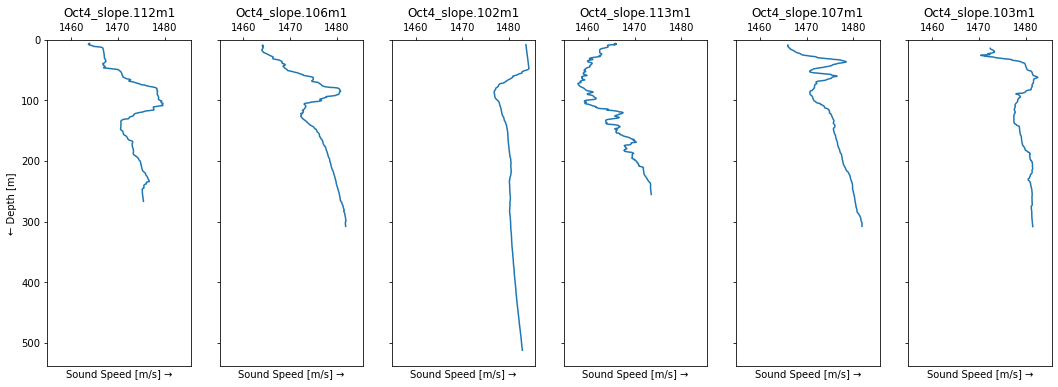

In [10]:
n_ssps = len(ana_ss.SSPs)

fig = plt.figure(figsize=(18, 6))

# First get some data allowing the plots to be scaled correctly

min_ss = 10000
max_ss = 0

max_dep = 0
for i in range(n_ssps):
    if ana_ss.SSPs[i].d[-2] > max_dep:
        max_dep = ana_ss.SSPs[i].d[-2]
    if min(ana_ss.SSPs[i].c[0:-1]) < min_ss:
        min_ss = min(ana_ss.SSPs[i].c[0:-2])
    elif max(ana_ss.SSPs[i].c) > max_ss:
        max_ss = max(ana_ss.SSPs[i].c[0:-2])
        
dep_range = (0, max_dep+max_dep/20)
ss_range = (min_ss-3,max_ss+3)
ax = plt.subplot(1,n_ssps,1)
ana_ss.SSPs[0].draw(False, ax, dep_range, ss_range,True)
for i in range(1,n_ssps):
    ax = plt.subplot(1,n_ssps,i+1)
    ana_ss.SSPs[i].draw(False, ax, dep_range, ss_range, False)


#### B.2.3.2 Selecting a profile 

In this step we will select the profile `Oct4_slope.102m1.txt` and select it as the profile to use. 

In [11]:
for i in range(n_ssps):
    if os.path.basename(ana_ss.SSPs[i].metadata['name']) == 'Oct4_slope.102m1.txt':
        select_profile = i
        break

#### B.2.3.3 Creating a Swath

In this step you will create a swath by creating a set of depression angles $\theta$ called `th`, a starting depth of 7 m called `depth_s` and an ending depth of 200 m called simply `depth`.

In [12]:
th = np.linspace(20,160,20) # depression angles in degrees
th *= pi/180                # Convert to degrees
n_beams = len(th)
d_start = 7
depth = 200

#### B.2.3.4 Calculating  TWTT times and Radial Distances for all the Profiles

In this step we use an inverse ray trace algorithm to arrive at TWTTs from a given depth, sound speed profile and array of depression angles for all of the profiles.  We will assume that the sound speed in the profile matches that of the observed sound speed. The resulting matrix `true_TWTT` will have the TWTTs for all beams along the columns. Each row represents the results for a particular profile.

In [13]:
true_TWTT = np.zeros((n_ssps,n_beams))
true_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ana_ss.SSPs[i].determine_c(d_start)
    for j in range(n_beams):
        true_TWTT[i,j],true_rad_dist[i,j],_,_= ana_ss.SSPs[i].determine_twtt(d_start, th[j], ss_start, depth)


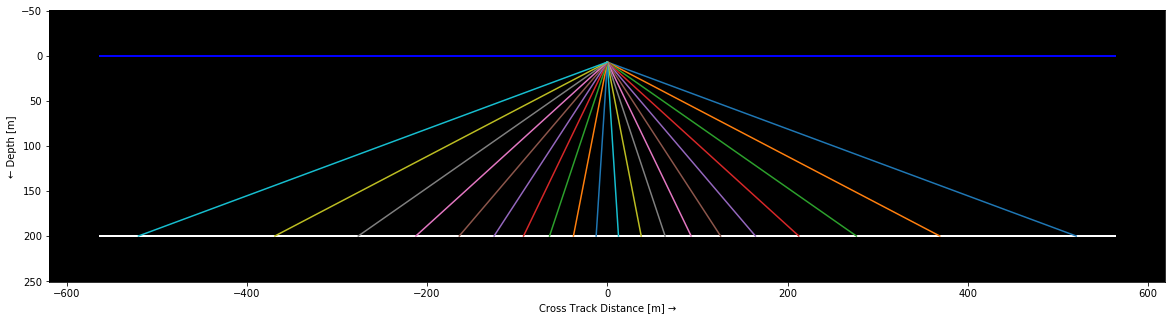

In [14]:
fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot the bottom in white 
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(depth,depth),'w',linewidth=2)

# Add the center of each beam for the selected profile (as a straight line from the transducer to the bottom)

for i in range(n_beams):
    plt.plot((0,true_rad_dist[select_profile,i]),(d_start,depth))

ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]');


#### B.2.3.5 Calculating Depths from the TWTTs using the selected profile

In this step we use the TWTTs to the depth of interest `depth` for the various profiles. If we used these same profiles to then calculate depths from TWTTs we should get a difference of zero, as we used the correct profiles for the correct locations. 

Here we will simulate what happens when you use an incorrect profile. An example of this is when you use a profile that was obtained a long time ago and/or far away from your current location.

In [15]:
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ana_ss.SSPs[select_profile].determine_c(d_start)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ana_ss.SSPs[select_profile].determine_depth(d_start, th[j], ss_start, true_TWTT[i,j])


#### B.2.3.6 Comparing the selected profile with itself

We logically expect that if the profile that we used is the correct one that the differences between the modeled and the true depth will be zero. That is we expect that the difference between the `depth` that we used to calculate the TWTTs and the modeled depths `model_depth` for the selected profile `select_profile` match to within a small tolerance.

First we will create two matrices of the errors, called `depth_errors` and `rad_dist_errors` respectively. An error is considered the difference between an observation and the truth. Note that for the comparison of the cross track distances we need to refer to the calculated radial distances for the selected profile, as this is not given in the input

In [16]:
depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[select_profile,]



Now we will compare the estimated error to a tolerance factor of 1mm

In [17]:
tolerance = 10**-3   # If the results differ by less than 1mm we will assign them to be a match

# Test the results from the depths
if any(abs(depth_errors[select_profile,])>tolerance):
    print("Results do not match!")
else:
    print( "Results match")
    
# Specifically set a value to zero if smaller than the tolerance

depth_errors[abs(depth_errors)<tolerance]=0

Results match


In [18]:
# Test the results from the depths
if any(abs(rad_dist_errors[select_profile,])>tolerance):
    print("Results do not match!")
else:
    print( "Results match")
    
# Specifically set a value to zero if smaller than the tolerance

rad_dist_errors[abs(rad_dist_errors)<tolerance]=0

Results match


Answer essay question 7 

#### B.2.3.6 Comparing the selected profile with all other profiles

It is more interesting to compare the results of the ray tracing with other profiles, that is what does the bottom look like if we use the selected profile instead of the appropriate profile for the locations at which the profiles are obtained. In the plot below you see the resulting bottom for all the profiles. Off-course there is one set of bottom locations that do not show error (plotted in white), this is for the case where we are comparing the results for the selected profile against itself.

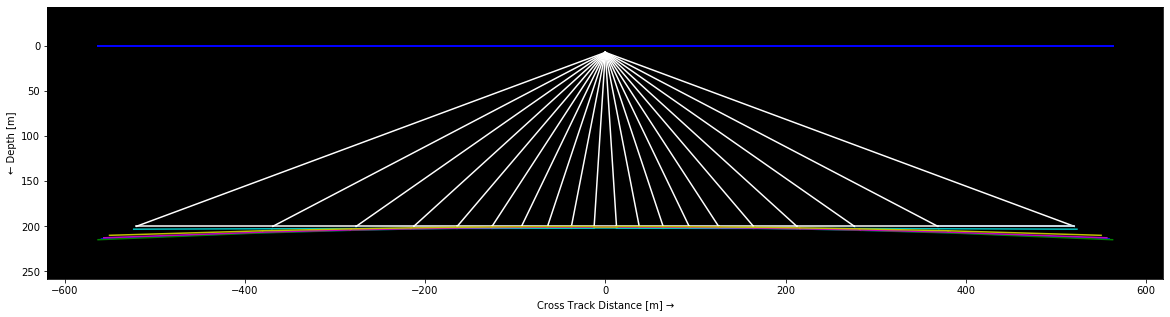

In [19]:
fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot all the beams and bottom segments for the selected profile

for j in range(n_beams):
    plt.plot((0,true_rad_dist[select_profile,j]),(d_start,model_depth[select_profile,j]),'w')

plt.plot((true_rad_dist[select_profile,0],true_rad_dist[select_profile,1]), \
             (model_depth[select_profile,0],model_depth[select_profile,1]))

# Create an list of colors

colors = ('b','g','r','c','m','y')

for i in range(n_ssps):
    if i == select_profile:
        color = 'w'
    else:
        color = colors[i%6]
    for j in range(n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (model_depth[i,j],model_depth[i,j+1]),color)


ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]');

#### B.2.3.7 Comparing the selected profile to individual other profiles

Although the plot above leads to an interesting overview it is more useful to compare the results directly

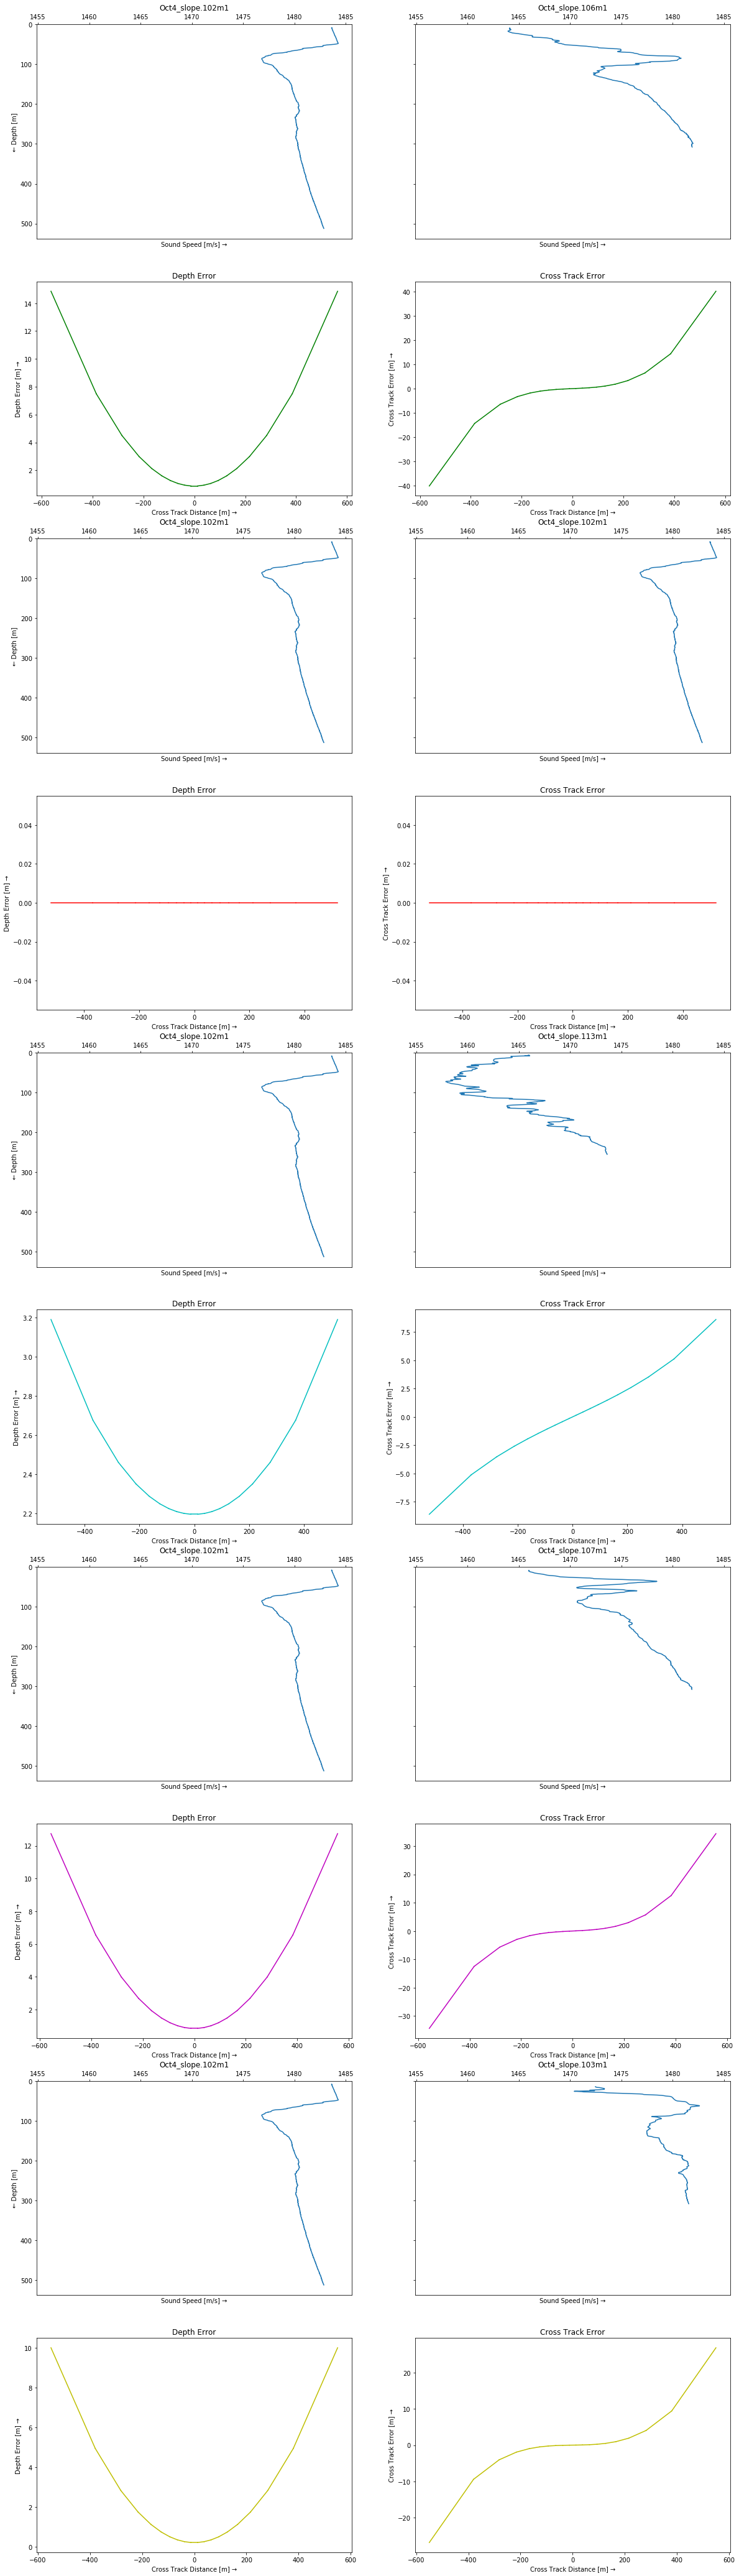

In [20]:
fig = plt.figure(figsize=(20, 15*n_ssps))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

for i in range(1,n_ssps):
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+1)
    ana_ss.SSPs[select_profile].draw(False, ax, dep_range, ss_range, True)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+2)
    ana_ss.SSPs[i].draw(False, ax, dep_range, ss_range, False)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+3)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Depth Error [m] →')
    ax.title.set_text('Depth Error')
    color = colors[i%6]
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (depth_errors[i,j],depth_errors[i,j+1]),color)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+4)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Cross Track Error [m] →')
    ax.title.set_text('Cross Track Error')
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (rad_dist_errors[i,j],rad_dist_errors[i,j+1]),color)
    

# ___
<br>

<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

# Essay Questions

<br>
Answer the questions below in essay form. Keep the answers short and concise!

    1. comment on whether the induced errors are significant compared 
       to IHO Order 1 required horizontal or vertical accuracies. 
       Note whether/how this compliance changes as a function of beam
       angle.
       
    2. Why are the 4 data fields discussed in paragraph B.0 useful? 
    
    3. Why are the duplicate records removed in reverse order in step B.0.2.8?
    
    4. In B.0.2.10 we extended the profiles upwards to the surface assuming 
       that the water near the surface is well mixed. Would this give a problem 
       on a calm and hot sunny afternoon? Explain your answer using the 
       word 'gradient' 

    5. in B.0.2.13 we replaced the zero values in the array self.g using the Boolean 
       vector self.g == 0 in the expression self.g[self.g == 0] = 0.00001. Explain what 
       this expression does.
       
    6. Unless you have adapted your code to deal with ray reversal you would have 
       received a warning when determining the depression angles 𝜃𝑖 in step 
       B.1.3.0.3. Assuming that you loaded the data contained in the file     
       'Oct4_slope.112m1.txt' into an SSP object 'ssp' and called the method as follows 
       'ssp.determine_depth(d_start,20*pi/180,1464.5,0.2)'
           a. From which layer does the warning originate? How do you know?
           c. What is the sound speed at which this occurs?
           b. At what depth in this layer does the ray reversal occur i.e., does it go 
              from going downward to upward?
           d. Given the location of the survey do you think a ray reversal can occur in 
              reality for this signal? 
              
     7. In B.2.3.6 we looked at row `select_profile` and found that the errors 
        were insignificant. Do you expect the results in the other rows to be 
        insignificant as well?, Why do you think this is the case?
        
     8. What do you think will lead to a generally greater improvement in positioning of 
        bathymetry data, taking more sound speed casts or paying for a GNSS augmentation
        service? To answer this question you may assume that unaided GNSS (known as single 
        point) positioning has an uncertainty of approx 10m, whereas aided GNSS can get you
        to cm level uncertainty.
        
     9. Would your answer change for very shallow water?
     
     Note that you are encouraged to investigate scenarios by changing the parameters in 
     this Notebook, just make sure that you can revert back to the original.
        

    



<img align="left" width="6%" style="padding-right:10px; padding-top:10px;" src="../Images/refs.png">

## Useful References

* [The official Python 3.6 documentation](https://docs.python.org/3.6/index.html)
  * [Classes](https://docs.python.org/3.6/tutorial/classes.html)
  * [String Representation Method](https://docs.python.org/3.6/reference/datamodel.html?highlight=repr#object.__str__)
* [Memory address](https://en.wikipedia.org/wiki/Memory_address)
* [ePOM: Programming Basics with Python](https://github.com/hydroffice/python_basics)
* [ePOM: Foundations of Ocean Data Science](../../ocean_data_science)


<img align="left" width="5%" style="padding-right:10px;" src="../Images/email.png">

*For issues or suggestions related to this notebook that should not be addressed on Piazza, write to: semmed@ccom.unh.edu*

Lab B Created by John E. Hughes Clarke<br>
Python code and Jupyter Notebook implementation by Semme J. Dijkstra